In [38]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from mpl_toolkits.mplot3d import Axes3D
from itertools import combinations
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
from matplotlib import rcParams

# 设置支持中文的字体
rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
rcParams['axes.unicode_minus'] = False   # 解决负号显示问题

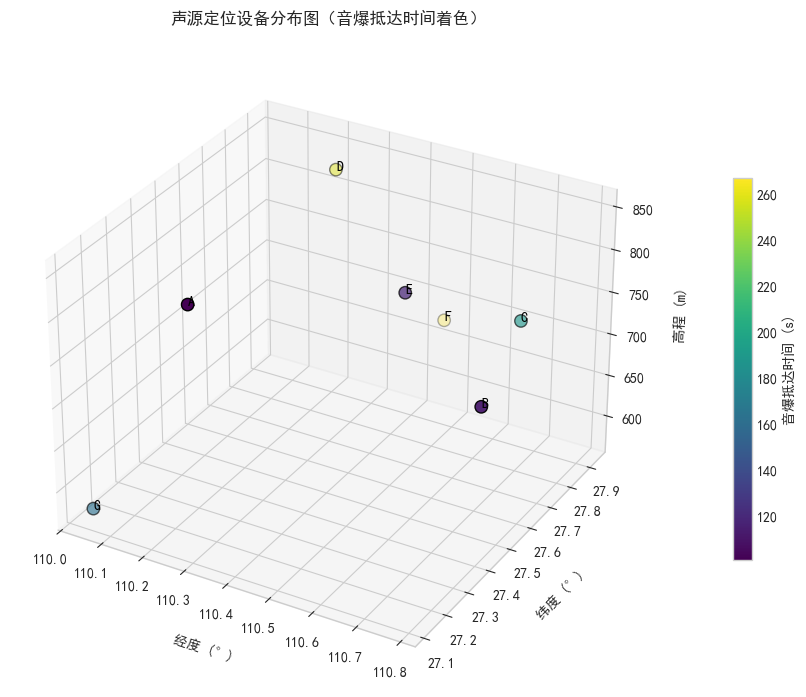

In [39]:
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import rcParams

# 设置字体以支持中文显示
rcParams['font.family'] = 'SimHei'  # 黑体
rcParams['axes.unicode_minus'] = False  # 正常显示负号

# 数据定义
data = {
    '设备': ['A', 'B', 'C', 'D', 'E', 'F', 'G'],
    '经度': [110.241, 110.780, 110.712, 110.251, 110.524, 110.467, 110.047],
    '纬度': [27.204, 27.456, 27.785, 27.825, 27.617, 27.921, 27.121],
    '高程': [824, 727, 742, 850, 786, 678, 575],
    '时间': [100.767, 112.220, 188.020, 258.985, 118.443, 266.871, 163.024],
}

df = pd.DataFrame(data)

# 创建图形
fig = plt.figure(figsize=(9, 7))
ax = fig.add_subplot(111, projection='3d')

# 绘制3D散点图
sc = ax.scatter(df['经度'], df['纬度'], df['高程'],
                c=df['时间'], cmap='viridis', s=80, edgecolors='k', depthshade=True)

# 添加设备标签
for i in range(len(df)):
    ax.text(df['经度'][i], df['纬度'][i], df['高程'][i],
            df['设备'][i], size=10, color='black')

# 设置轴标签和标题
ax.set_xlabel('经度 (°)', labelpad=10)
ax.set_ylabel('纬度 (°)', labelpad=10)
ax.set_zlabel('高程 (m)', labelpad=10)
ax.set_title('声源定位设备分布图（音爆抵达时间着色）', pad=20)

# 添加颜色条表示音爆时间
cbar = fig.colorbar(sc, ax=ax, shrink=0.6, pad=0.1)
cbar.set_label('音爆抵达时间 (s)')

plt.tight_layout()
plt.show()


 步骤 1：基础设置与数据预处理
📌目标：
将设备数据转为numpy数组

转换为笛卡尔坐标便于三维可视化

初始绘图

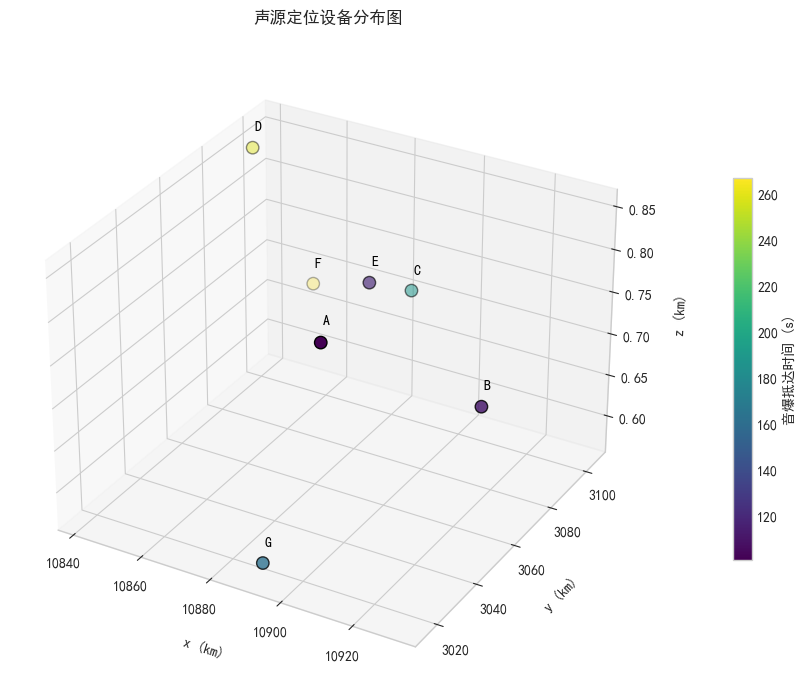

In [40]:
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import rcParams
import numpy as np

# 设置字体以支持中文显示
rcParams['font.family'] = 'SimHei'  # 黑体
rcParams['axes.unicode_minus'] = False  # 正常显示负号

# 数据定义
data = {
    '设备': ['A', 'B', 'C', 'D', 'E', 'F', 'G'],
    '经度': [110.241, 110.780, 110.712, 110.251, 110.524, 110.467, 110.047],
    '纬度': [27.204, 27.456, 27.785, 27.825, 27.617, 27.921, 27.121],
    '高程': [824, 727, 742, 850, 786, 678, 575],
    '时间': [100.767, 112.220, 188.020, 258.985, 118.443, 266.871, 163.024],
}
df = pd.DataFrame(data)

# 将经纬度（度）转换为近似平面坐标（单位: km），考虑地球半径R=6371 km
R = 6371
df['x'] = R * np.cos(np.radians(df['纬度'])) * np.radians(df['经度'])
df['y'] = R * np.radians(df['纬度'])
df['z'] = df['高程'] / 1000  # 高度单位转换为 km

# 创建图形
fig = plt.figure(figsize=(9, 7))
ax = fig.add_subplot(111, projection='3d')

# 绘制3D散点图
sc = ax.scatter(df['x'], df['y'], df['z'],
                c=df['时间'], cmap='viridis', s=80, edgecolors='k', depthshade=True)

# 添加设备标签（显示在点的右上方）
for i in range(len(df)):
    ax.text(df['x'][i] + 0.3,
            df['y'][i] + 0.3,
            df['z'][i] + 0.02,  # 20 米高度偏移
            df['设备'][i],
            size=10, color='black')

# 设置轴标签和标题（z轴单位改为 km）
ax.set_xlabel('x (km)', labelpad=10)
ax.set_ylabel('y (km)', labelpad=10)
ax.set_zlabel('z (km)', labelpad=10)
ax.set_title('声源定位设备分布图', pad=20)

# 添加颜色条
cbar = fig.colorbar(sc, ax=ax, shrink=0.6, pad=0.1)
cbar.set_label('音爆抵达时间 (s)')

plt.tight_layout()
plt.show()


步骤 2：组合分析并估算声源位置
我们对四点组合C(7,4)=35，对每组点估算“音爆源位置”。简单用“时间差最小回归点”方式近似（精确反演涉及波动方程，这里做模拟）。

In [41]:
from itertools import combinations

# 所有4点组合
indices = list(combinations(range(7), 4))
result_points = []

# 使用每组4个点，估算最小时间差中心点
for idx_group in indices:
    subset = df.loc[list(idx_group)]
    # 简化假设：以时间加权平均计算声源估计点
    weights = 1 / subset['时间']
    weights /= weights.sum()
    x_est = np.sum(subset['x'] * weights)
    y_est = np.sum(subset['y'] * weights)
    z_est = np.sum(subset['z'] * weights)
    result_points.append((x_est, y_est, z_est))

result_points = np.array(result_points)


步骤 3：绘制红色计算点 + 保存坐标（还原为经纬度）

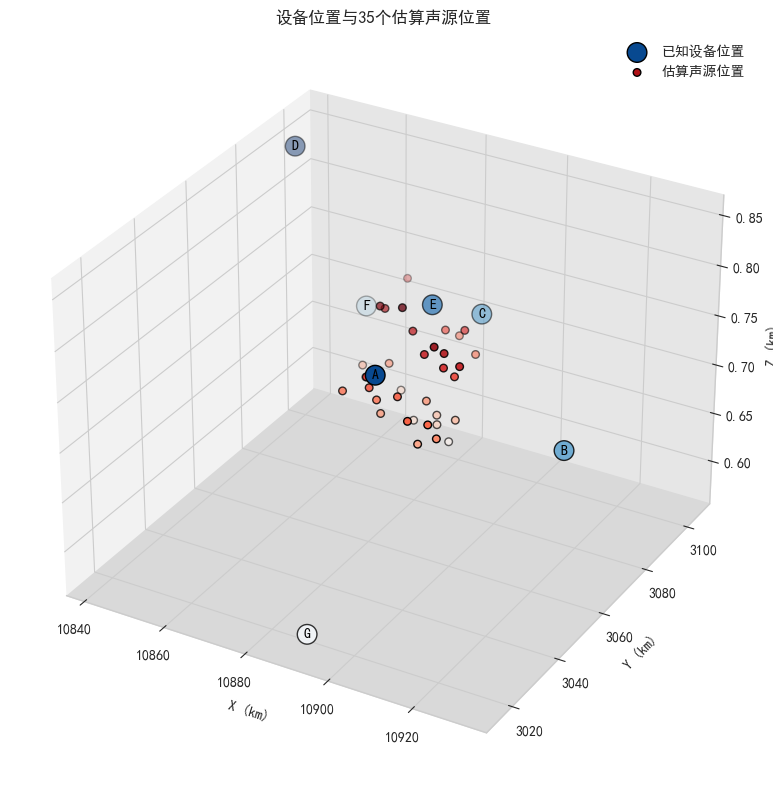

In [51]:
# 添加到图中
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 设置立体灰白背景
ax.xaxis.set_pane_color((0.95, 0.95, 0.95, 1.0))
ax.yaxis.set_pane_color((0.9, 0.9, 0.9, 1.0))
ax.zaxis.set_pane_color((0.85, 0.85, 0.85, 1.0))

# 已知设备点，颜色根据高度渐变（蓝色），点大小加大
device_colors = plt.cm.Blues((df['z'] - df['z'].min()) / (df['z'].max() - df['z'].min()))
ax.scatter(df['x'], df['y'], df['z'], c=device_colors, s=200, label='已知设备位置', edgecolors='k')

# 在设备点中心显示设备序号
for i in range(len(df)):
    ax.text(df['x'][i],
            df['y'][i],
            df['z'][i],
            df['设备'][i],  # 显示设备序号
            size=10, color='black', ha='center', va='center', weight='bold')

# 计算出的35个点，颜色根据高度渐变（红色）
result_colors = plt.cm.Reds((result_points[:, 2] - result_points[:, 2].min()) / (result_points[:, 2].max() - result_points[:, 2].min()))
ax.scatter(result_points[:, 0], result_points[:, 1], result_points[:, 2], c=result_colors, s=30, label='估算声源位置', edgecolors='k')

# 设置轴标签和标题
ax.set_xlabel('X (km)')
ax.set_ylabel('Y (km)')
ax.set_zlabel('Z (km)')
ax.set_title('设备位置与35个估算声源位置')
ax.legend()

plt.tight_layout()
plt.show()

In [43]:
# 从笛卡尔反推经纬度
lon = np.degrees(result_points[:,0] / (R * np.cos(np.radians(df['纬度'].mean()))))
lat = np.degrees(result_points[:,1] / R)
alt = result_points[:,2] * 1000  # 转回米

# 保存结果
result_df = pd.DataFrame({
    '估算经度': lon,
    '估算纬度': lat,
    '估算高度': alt
})
print(result_df)


          估算经度       估算纬度        估算高度
0   110.583661  27.480051  781.161676
1   110.624583  27.474662  774.260578
2   110.601940  27.491534  757.780134
3   110.640025  27.363358  730.632424
4   110.569021  27.465097  789.162368
5   110.535264  27.481201  774.419877
6   110.580795  27.347401  744.522212
7   110.585405  27.475368  768.164834
8   110.621111  27.360333  742.813786
9   110.598543  27.358030  721.659080
10  110.450343  27.529806  800.165409
11  110.386891  27.561738  785.366263
12  110.452936  27.401275  750.177508
13  110.468379  27.541691  776.463858
14  110.517754  27.407488  747.394343
15  110.472642  27.413669  724.070814
16  110.393009  27.533986  794.451789
17  110.451264  27.393535  762.374710
18  110.390180  27.397329  740.587264
19  110.468783  27.404527  739.204750
20  110.541580  27.626873  766.679251
21  110.494803  27.681159  743.993328
22  110.552977  27.502221  711.409940
23  110.560702  27.639633  741.924467
24  110.604163  27.492596  714.694853
25  110.5739

步骤 4：统计分析 u、s（均值、标准差）

In [44]:
mean_lon = np.mean(lon)
std_lon = np.std(lon)
mean_lat = np.mean(lat)
std_lat = np.std(lat)
mean_alt = np.mean(alt)
std_alt = np.std(alt)

print(f"经度：均值={mean_lon:.6f}，标准差={std_lon:.6f}")
print(f"纬度：均值={mean_lat:.6f}，标准差={std_lat:.6f}")
print(f"高度：均值={mean_alt:.2f}，标准差={std_alt:.2f}")


经度：均值=110.502111，标准差=0.090769
纬度：均值=27.500503，标准差=0.096289
高度：均值=745.14，标准差=29.79


步骤 5：正态分布图绘制

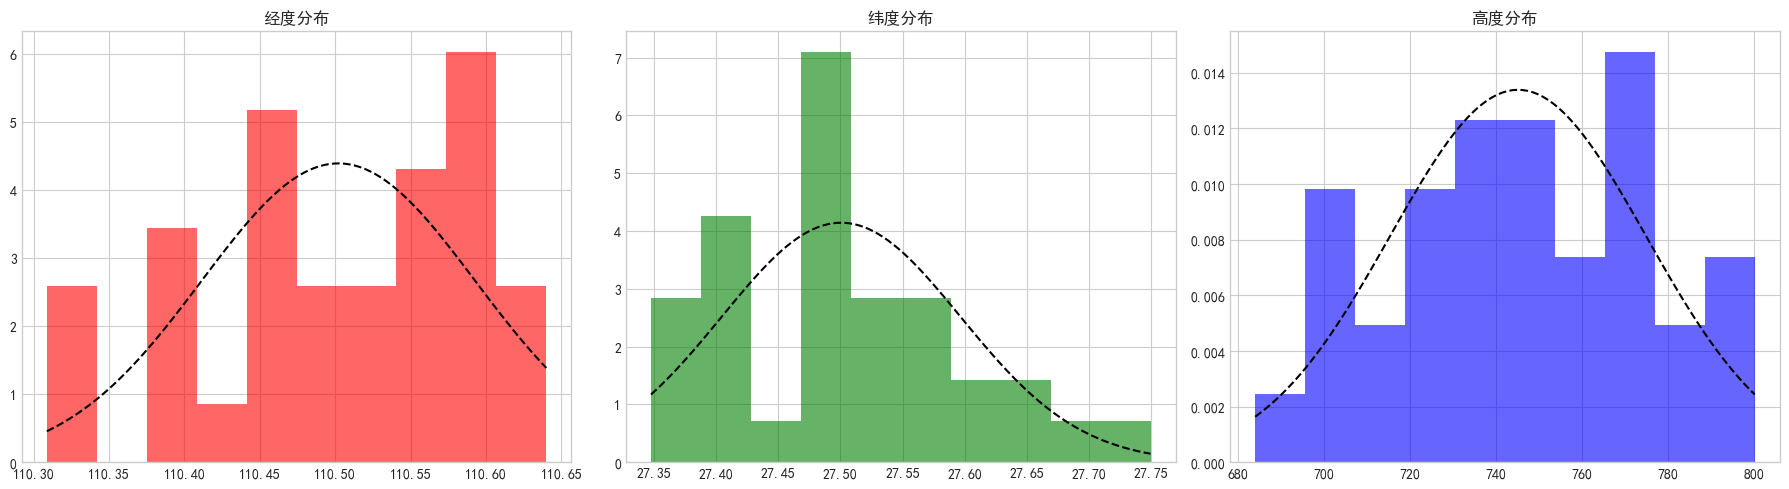

In [45]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 经度分布
x1 = np.linspace(min(lon), max(lon), 100)
axes[0].hist(lon, bins=10, density=True, alpha=0.6, color='r')
axes[0].plot(x1, norm.pdf(x1, mean_lon, std_lon), 'k--')
axes[0].set_title("经度分布")

# 纬度分布
x2 = np.linspace(min(lat), max(lat), 100)
axes[1].hist(lat, bins=10, density=True, alpha=0.6, color='g')
axes[1].plot(x2, norm.pdf(x2, mean_lat, std_lat), 'k--')
axes[1].set_title("纬度分布")

# 高度分布
x3 = np.linspace(min(alt), max(alt), 100)
axes[2].hist(alt, bins=10, density=True, alpha=0.6, color='b')
axes[2].plot(x3, norm.pdf(x3, mean_alt, std_alt), 'k--')
axes[2].set_title("高度分布")

plt.tight_layout()
plt.show()
